In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transaction1 = pd.read_excel(r'/Users/zayed/Documents/Data analysis projects/Forage/Quantium/QVI Transaction Data.xlsx')
transaction = transaction1.copy()
transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [3]:
# Check to see if there are nulls
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

There are no nulls, therefore, we can get to converting columns to a more usable type

In [4]:
# Converting excel date to pandas date format
transaction['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transaction['DATE'], unit='D')
transaction['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [5]:
# renaming columns to lower case so that they are easier to call
transaction.columns = transaction.columns.str.lower()
transaction.columns

Index(['date', 'store_nbr', 'lylty_card_nbr', 'txn_id', 'prod_nbr',
       'prod_name', 'prod_qty', 'tot_sales'],
      dtype='object')

In [6]:
# checking data types of our columns to ensure they are useable
transaction.dtypes

date              datetime64[ns]
store_nbr                  int64
lylty_card_nbr             int64
txn_id                     int64
prod_nbr                   int64
prod_name                 object
prod_qty                   int64
tot_sales                float64
dtype: object

In [7]:
# investigating data to see if there are any anomalies
pd.set_option('display.float_format', '{:.2f}'.format) #disable scientific notation in pandas
transaction.describe(include='all')

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
count,264836,264836.00,264836.00,264836.00,264836.00,264836,264836.00,264836.00
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,2018-12-30 00:52:12.879215616,135.08,135549.48,135158.31,56.58,NaN,1.91,7.30
min,2018-07-01 00:00:00,1.00,1000.00,1.00,1.00,NaN,1.00,1.50
25%,2018-09-30 00:00:00,70.00,70021.00,67601.50,28.00,NaN,2.00,5.40
50%,2018-12-30 00:00:00,130.00,130357.50,135137.50,56.00,NaN,2.00,7.40
75%,2019-03-31 00:00:00,203.00,203094.25,202701.25,85.00,NaN,2.00,9.20
max,2019-06-30 00:00:00,272.00,2373711.00,2415841.00,114.00,NaN,200.00,650.00


The data seem to be largely without anomalies. 
The only potential anomaly might be the prod_qty max. Here, though the 75th percentile remains just 2 units, the max is 200 units. This deserves further investigation later. 

<Axes: ylabel='prod_qty'>

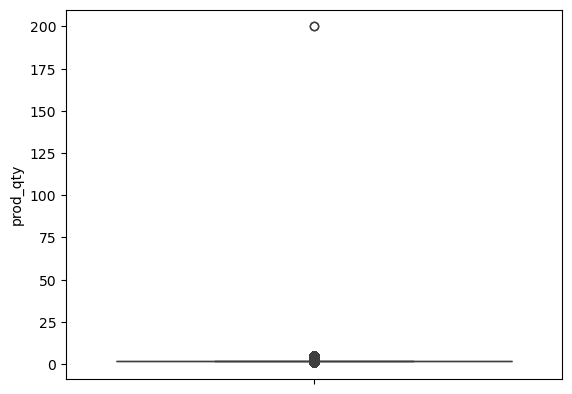

In [8]:
# visualizing this variable's distribution
sns.boxplot(transaction.prod_qty)

The boxplot certainly makes it seem like this is an outlier. Let us investigate these observations. 

In [9]:
#Viewing outlier observations (above the 99th percentile)
transaction[transaction.prod_qty > transaction.prod_qty.quantile(0.99)]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
11,2018-08-20,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.00
16,2018-08-18,20,20418,17413,94,Burger Rings 220g,4,9.20
...,...,...,...,...,...,...,...,...
258745,2019-05-19,220,220338,219884,98,NCC Sour Cream & Garden Chives 175g,3,9.00
258759,2019-05-14,238,238169,242560,44,Thins Chips Light& Tangy 175g,4,13.20
258770,2019-05-18,248,248246,250503,80,Natural ChipCo Sea Salt & Vinegr 175g,3,9.00
258782,2018-08-15,259,259174,258569,92,WW Crinkle Cut Chicken 175g,3,5.10


It appears that we have 1279 rows above the 99th percentile with normal prod_qty values. Let us make our query more explicit

In [10]:
transaction[transaction.prod_qty > 10]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00


2 customers have purchased 200 units of 380 gram chips. Is this an anomaly? Let us view other transactions they may have made to ascertian this.

In [11]:
# Viewing the customers' other transactions with their txn_id
transaction[transaction.txn_id.isin([226201, 226210])]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00


Since these are the only 2 transactions that are unusual (and don't represent the usual customer in regards to our analysis) we shall exclude them

In [12]:
#excluding these items from our data set
transaction = transaction[~transaction.txn_id.isin([226201, 226210])]
transaction

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.80
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.40
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.80
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.80


In [13]:
#splitting up Date columns as this may be useful in future analysis
#transaction['dayofmonth'] = 
transaction['dayofmonth'] = transaction.date.dt.day
transaction['dayofweek'] = transaction.date.dt.day_name()
transaction['year'] = transaction.date.dt.year
transaction['month'] = transaction.date.dt.month
transaction.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,dayofmonth,dayofweek,year,month
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,17,Wednesday,2018,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,14,Tuesday,2019,5
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,20,Monday,2019,5
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,17,Friday,2018,8
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,18,Saturday,2018,8


In [14]:
#extract packet size from product name
transaction['pkt_size'] = transaction.prod_name.str.extract('(\d+)').astype(int)
transaction.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_24699/378819608.py:2: SyntaxWarning: invalid escape sequence '\d'
  transaction['pkt_size'] = transaction.prod_name.str.extract('(\d+)').astype(int)


,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,dayofmonth,dayofweek,year,month,pkt_size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,17,Wednesday,2018,10,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,14,Tuesday,2019,5,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,20,Monday,2019,5,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,17,Friday,2018,8,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,18,Saturday,2018,8,150


In [15]:
#checking to see if there are any nulls 
transaction.pkt_size.isnull().sum()


0

In [16]:
# Extract company name from product name
transaction['company'] = transaction.prod_name.str.split(' ').str[0]
transaction.company.value_counts().reset_index()

,company,count
0,Kettle,41288
1,Smiths,28860
2,Pringles,25102
3,Doritos,24962
4,Thins,14075
5,RRD,11894
6,Infuzions,11057
7,WW,10320
8,Cobs,9693
9,Tostitos,9471


A couple of the company names have been mispelled, let us rectify this. 

In [17]:
transaction.loc[transaction.company == 'Dorito', 'company'] = 'Doritos'
transaction.loc[transaction.company == 'Infzns', 'company'] = 'Infuzions'
transaction.loc[transaction.company == 'Snbts', 'company'] = 'Sunbites'
transaction.loc[transaction.company == 'Smitsh', 'company'] = 'Smitsh'
transaction.loc[transaction.company == 'Red', 'company'] = 'RRD'
transaction.company.value_counts().reset_index()

,company,count
0,Kettle,41288
1,Smiths,28860
2,Doritos,28145
3,Pringles,25102
4,RRD,17779
5,Infuzions,14201
6,Thins,14075
7,WW,10320
8,Cobs,9693
9,Tostitos,9471


In [18]:
# transaction.prod_name.str.split(' ').str[-2].value_counts().reset_index().head(40)

In [19]:
# There are salsa products so let us remove them
transaction = transaction[~transaction['prod_name'].str.contains(r'Salsa')]

In [20]:
# changing dtype of packet size column
transaction['pkt_size'] = pd.to_numeric(transaction.pkt_size, errors='coerce').astype('Int32')

/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_24699/367123996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction['pkt_size'] = pd.to_numeric(transaction.pkt_size, errors='coerce').astype('Int32')


In [21]:
transaction.pkt_size.describe()

count   246740.00
mean       175.58
std         59.43
min         70.00
25%        150.00
50%        170.00
75%        175.00
max        380.00
Name: pkt_size, dtype: Float64

The values seem reasonable, and there are no outliers. The largest size is 380g and the smallest size is 70g

<Figure size 1500x500 with 0 Axes>

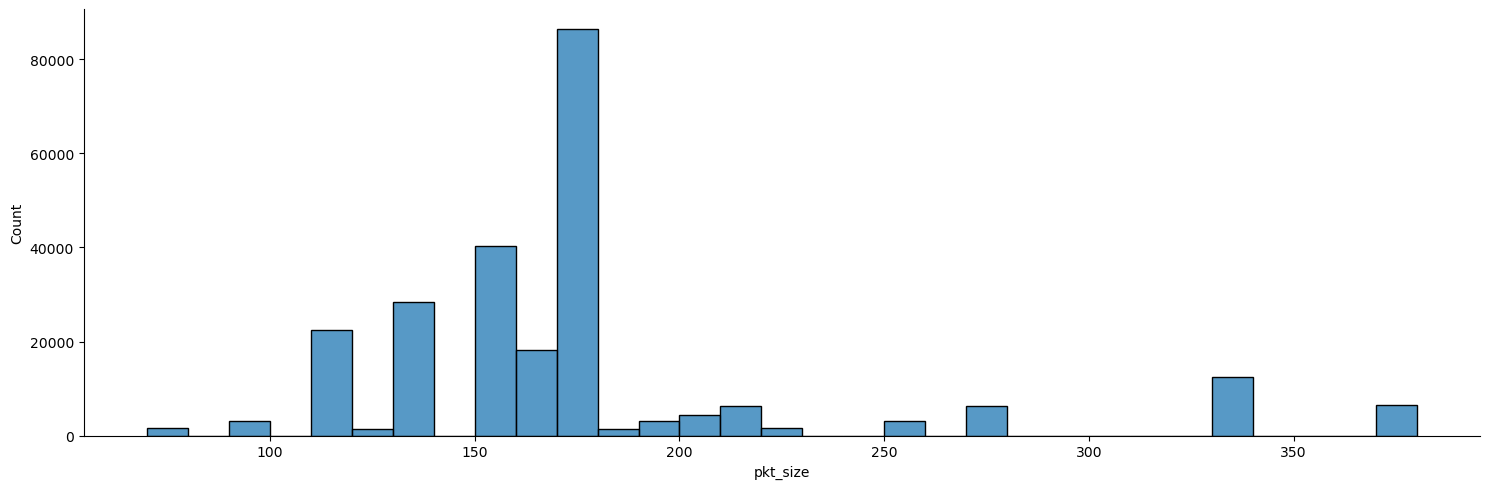

In [ ]:
# let us look at the distribution of values. 
plt.figure(figsize=(15,5))
sns.displot(transaction.pkt_size,binwidth =10,  height=5, aspect=3)

It looks like 175g is the most popular pack size, having over 80,000 counts. 

Let us now take a look at the customer data
### Examining customer data

In [23]:
customer = pd.read_csv(r'/Users/zayed/Documents/Data analysis projects/Forage/Quantium/QVI Purchase Behaviour.csv')
customer

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [24]:
#Preprocessing
print(f'The shape is {customer.shape} and the number of duplicates are {customer.duplicated().sum()}')
customer.columns = customer.columns.str.lower()
print(f'The data types are {customer.dtypes}')
customer.isna().sum()

The shape is (72637, 3) and the number of duplicates are 0
The data types are lylty_card_nbr       int64
lifestage           object
premium_customer    object
dtype: object


lylty_card_nbr      0
lifestage           0
premium_customer    0
dtype: int64

In [25]:
#Checking to see if there are any duplicates
customer.duplicated().sum()

0

There are 72637 observations with 0 nulls and 0 duplicates. The dtypes are appropriate. 

In [26]:
#merging datasets
df = pd.merge(transaction, customer, on='lylty_card_nbr', how='inner')
df

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,dayofmonth,dayofweek,year,month,pkt_size,company,lifestage,premium_customer
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,17,Wednesday,2018,10,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,14,Tuesday,2019,5,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,20,Monday,2019,5,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,17,Friday,2018,8,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,18,Saturday,2018,8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.80,9,Saturday,2019,3,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.40,13,Monday,2018,8,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.80,6,Tuesday,2018,11,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.80,27,Thursday,2018,12,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [27]:
#Checking to see if there are any nulls after the merge
transaction.isna().sum()

date              0
store_nbr         0
lylty_card_nbr    0
txn_id            0
prod_nbr          0
prod_name         0
prod_qty          0
tot_sales         0
dayofmonth        0
dayofweek         0
year              0
month             0
pkt_size          0
company           0
dtype: int64

In [28]:
df.to_csv('QVImerged.csv')

## Data analysis on customer segments
Now that the data is ready for analysis, we can define some metrics that may be of interest to the client
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

In [29]:
salesbysegment = df.groupby(['premium_customer', 'lifestage']).tot_sales.sum().reset_index()
salesbysegment

,premium_customer,lifestage,tot_sales
0,Budget,MIDAGE SINGLES/COUPLES,33345.70
1,Budget,NEW FAMILIES,20607.45
2,Budget,OLDER FAMILIES,156863.75
3,Budget,OLDER SINGLES/COUPLES,127833.60
4,Budget,RETIREES,105916.30
5,Budget,YOUNG FAMILIES,129717.95
6,Budget,YOUNG SINGLES/COUPLES,57122.10
7,Mainstream,MIDAGE SINGLES/COUPLES,84734.25
8,Mainstream,NEW FAMILIES,15979.70
9,Mainstream,OLDER FAMILIES,96413.55


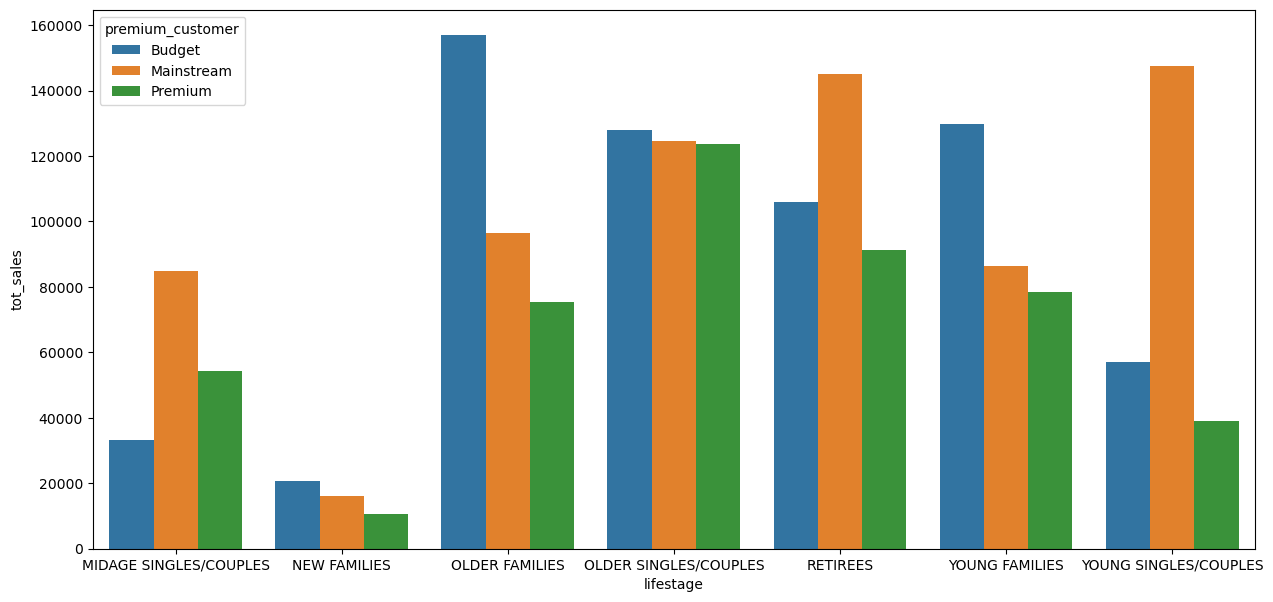

In [30]:

plt.figure(figsize=(15,7))
ax = sns.barplot(salesbysegment, y = 'tot_sales', x = 'lifestage', hue = 'premium_customer')


plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this next.

In [31]:
df.head()
averagesize = df.groupby(['premium_customer', 'lifestage', 'lylty_card_nbr']).prod_qty.sum().reset_index()
averagesize

,premium_customer,lifestage,lylty_card_nbr,prod_qty
0,Budget,MIDAGE SINGLES/COUPLES,1052,1
1,Budget,MIDAGE SINGLES/COUPLES,1081,4
2,Budget,MIDAGE SINGLES/COUPLES,1184,1
3,Budget,MIDAGE SINGLES/COUPLES,1307,6
4,Budget,MIDAGE SINGLES/COUPLES,1343,2
...,...,...,...,...
71282,Premium,YOUNG SINGLES/COUPLES,272236,4
71283,Premium,YOUNG SINGLES/COUPLES,272319,4
71284,Premium,YOUNG SINGLES/COUPLES,272358,1
71285,Premium,YOUNG SINGLES/COUPLES,272379,4


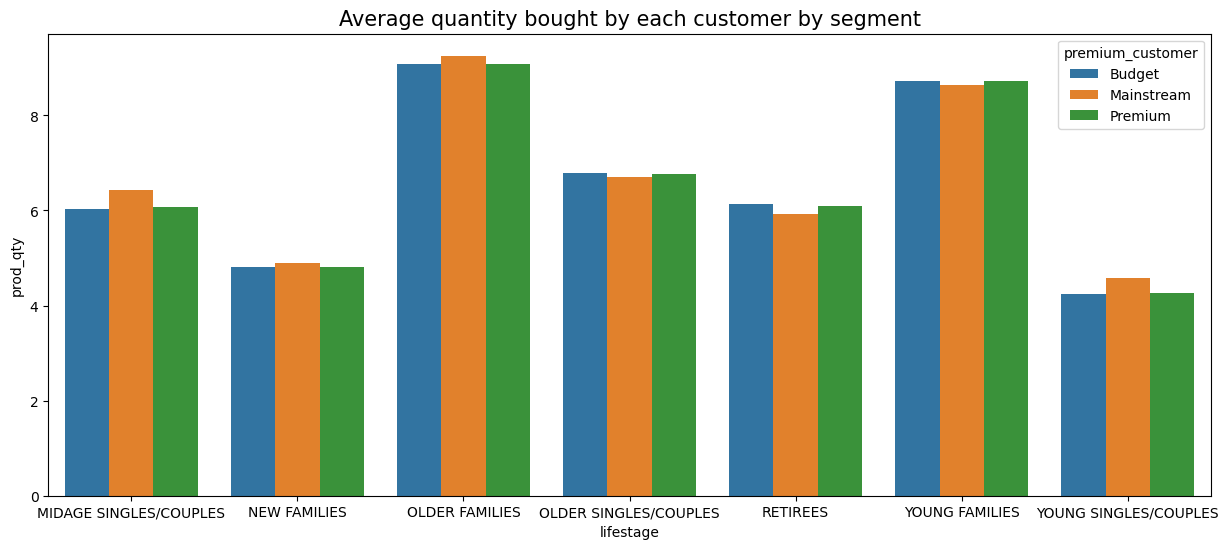

In [32]:
averageqty = averagesize.groupby(['premium_customer', 'lifestage']).prod_qty.mean().reset_index()
averageqty
plt.figure(figsize=(15,6))
sns.barplot(averageqty, x = 'lifestage', y = 'prod_qty', hue = 'premium_customer').set_title('Average quantity bought by each customer by segment').set_fontsize(15)

Older families and young families in general buy more chips per customer.
Let’s also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [33]:
totalsalespercx = df.groupby(['premium_customer', 'lifestage', 'lylty_card_nbr'])[['tot_sales', 'prod_qty']].sum().reset_index()
totalsalespercx['priceperunit'] = totalsalespercx.tot_sales / totalsalespercx.prod_qty
totalsalespercx
#totalsalespercx.groupby(['premium_customer', 'lifestage']).tot_sales.mean().reset_index()

,premium_customer,lifestage,lylty_card_nbr,tot_sales,prod_qty,priceperunit
0,Budget,MIDAGE SINGLES/COUPLES,1052,3.30,1,3.30
1,Budget,MIDAGE SINGLES/COUPLES,1081,11.30,4,2.82
2,Budget,MIDAGE SINGLES/COUPLES,1184,3.80,1,3.80
3,Budget,MIDAGE SINGLES/COUPLES,1307,12.20,6,2.03
4,Budget,MIDAGE SINGLES/COUPLES,1343,2.90,2,1.45
...,...,...,...,...,...,...
71282,Premium,YOUNG SINGLES/COUPLES,272236,15.00,4,3.75
71283,Premium,YOUNG SINGLES/COUPLES,272319,17.40,4,4.35
71284,Premium,YOUNG SINGLES/COUPLES,272358,4.40,1,4.40
71285,Premium,YOUNG SINGLES/COUPLES,272379,16.60,4,4.15


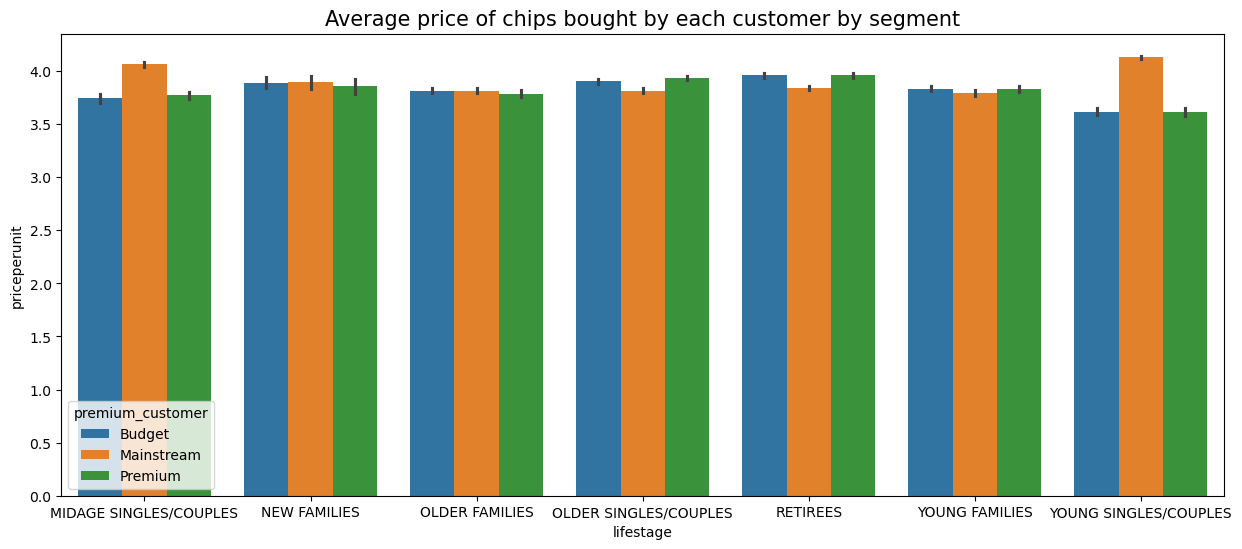

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(totalsalespercx, x = 'lifestage', y = 'priceperunit', hue = 'premium_customer').set_title('Average price of chips bought by each customer by segment').set_fontsize(15)

Mainstream midage and young singles and couples are more willing to pay more per packet of chips. 

Interesting, we would expect the premium segment to be paying more. 

This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts (as we saw in the previous graph)

### Running a t-test
As the difference in average price per unit isn't large, we can check to see if this difference is statistically significant. 

H1: The average price per unit paid by Mainstream customers is greater than the average price per unit paid by non-Mainstream customers in the specified lifestages

H0: Average price per unit is not different across the two groups. 

The two groups in question are mainstream and non mainstream customers in the young and midage singles and couples. 

In [35]:
import scipy.stats as st
# Find the average price per unit of mainstream customers in those segments. 
df['priceperunit'] = df.tot_sales/df.prod_qty
mainstream = df.query('premium_customer == "Mainstream" & lifestage.isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])')['priceperunit']
nonmainstream = df.query('premium_customer != "Mainstream" & lifestage.isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])')['priceperunit']
print(mainstream.mean(), nonmainstream.mean())

4.039785893795489 3.706491319964083


In [37]:
df.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,dayofmonth,dayofweek,year,month,pkt_size,company,lifestage,premium_customer,priceperunit
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,17,Wednesday,2018,10,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,14,Tuesday,2019,5,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,20,Monday,2019,5,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,17,Friday,2018,8,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,18,Saturday,2018,8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [38]:
st.ttest_ind(mainstream, nonmainstream, alternative = 'greater', equal_var = False )


TtestResult(statistic=37.6243885962295, pvalue=3.4836771165090696e-306, df=54791.09392740315)

The t test resulted in a p-value 3.4836771165090696e-306 which is an extremely small number close to zero. 

This means that the null hypothesis is rejected, and we can conclude that the average price per unit for mainstream customes were higher than non-mainstream customers in the young and midage singles and couples segment. 

### Deep dive into specific customer segments for insights

We have found quite a few interesting insights that we can dive deeper into. 

We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.  

In [39]:
segment1 = df.query('lifestage == "YOUNG SINGLES/COUPLES" & premium_customer == "Mainstream"')
othersegments = df.query('~(lifestage == "YOUNG SINGLES/COUPLES" & premium_customer == "Mainstream")')

#Isolating quantity column
quantity_segment1 = segment1.prod_qty.sum()
quantity_other = othersegments.prod_qty.sum()

#Grouping by brand

pd.options.display.float_format = '{:.4f}'.format
qty_segment1_company = segment1.groupby('company').agg(targetSegment=('prod_qty', 'sum')) / quantity_segment1
qty_other_company = othersegments.groupby('company').agg(othersegment =('prod_qty', 'sum')) / quantity_other



merged_df = pd.merge(qty_segment1_company, qty_other_company, on='company', how='inner').reset_index()
merged_df['affinity_to_company'] = merged_df.targetSegment/merged_df.othersegment
merged_df.sort_values(by= 'affinity_to_company', ascending=False)

,company,targetSegment,othersegment,affinity_to_company
21,Tyrrells,0.0316,0.0257,1.2281
20,Twisties,0.0462,0.0379,1.2193
5,Doritos,0.1228,0.1011,1.2146
10,Kettle,0.1980,0.1656,1.1959
19,Tostitos,0.0454,0.0380,1.1957
13,Pringles,0.1194,0.1006,1.1867
7,Grain,0.0291,0.0251,1.1593
4,Cobs,0.0446,0.0390,1.1431
9,Infuzions,0.0647,0.0571,1.1334
18,Thins,0.0604,0.0570,1.0594


Explanation: The `targetsegment` column shows the probability that a customer in the target segment will purchase from the relevant company when buying chips. The `othersegment` column represents the same probability, but for customers not in the target segment. The final column calculates the ratio of these two probabilities, showing how much higher or lower the likelihood is for the target segment compared to the other segment.


We can see that :
- Mainstream young singles/couples are 22% more likely to purchase Tyrrells chips compared to the
rest of the population
- Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population

Let's find out if our target segment also tends to buy bigger packs of chips

In [81]:
#Creating a table that details the probability of purchase a certain packet size
segment1bypkt = segment1.groupby('pkt_size').agg(target_pkt = ('prod_qty', 'sum')) / segment1.prod_qty.sum()
othersegmentsbypkt = othersegments.groupby('pkt_size').agg(segment_pkt = ('prod_qty', 'sum')) / othersegments.prod_qty.sum()
merged_pkt = pd.merge(segment1bypkt, othersegmentsbypkt, on='pkt_size', how='inner').reset_index()
merged_pkt['affinity_to_pkt'] = merged_pkt.target_pkt/merged_pkt.segment_pkt
merged_pkt.sort_values( by = 'affinity_to_pkt', ascending = False)


,pkt_size,target_pkt,segment_pkt,affinity_to_pkt
17,270,0.0318,0.0251,1.2683
19,380,0.0322,0.0256,1.2570
18,330,0.0613,0.0502,1.2217
4,134,0.1194,0.1006,1.1867
2,110,0.1063,0.0898,1.1836
14,210,0.0291,0.0251,1.1593
5,135,0.0148,0.0131,1.1295
16,250,0.0144,0.0128,1.1232
9,170,0.0808,0.0810,0.9974
6,150,0.1576,0.1634,0.9644


It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [90]:
# searching for companies that sell 270g packets
df.query('pkt_size == 270').company.unique()

/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_24699/2697368653.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df.query('pkt_size == 270').company.unique()


array(['Twisties'], dtype=object)

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.

Let’s recap what we’ve found!
- Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. 
- Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
- We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.
